# Project at Computer Graphics: Edge Detection


In this project I will be implementing the Canny algorithm for edge detection in images for the first avaliation of the discipline Introdução a Computação Gráfica at FGV. 

In [1]:
from PIL import Image
import numpy as np
from IPython.display import display
import time

In [2]:
def canny_algorithm(url, t1, t2):
    t = time.process_time()
    #opening data
    im = Image.open(url)
    data_full = np.array(im.getdata())
    width = im.width
    height = im.height
    
    t = time.process_time() - t
    print('Opening: ',t)
    #grayscale
    for i in range(len(data_full)):
        data_full[i][0] = data_full[i].mean()
    
    
    t = time.process_time() - t
    print('Grayscale: ',t)
    
    #using only one layer
    data_full = data_full.reshape(height, width, 3)
    data = np.copy(data_full[:,:,1])
    
    
    t = time.process_time() - t
    print('Selecting layer:' , t)
    
    #applying gaussian filter
    def gaussian_func(x,y):
        val = np.pi*2
        e = -((x-2)**2+(y-2)**2)/2
        return np.exp(e)/val
    
    def convolution(matriz_coef, data, x, y):
        ans = 0
        for i in range(x-2,x+3):
            for j in range(y-2,y+3):
                if (0<=i<height) and (0<=j<width):
                    ans += matriz_coef[i+2-x][j+2-y]*data[i][j]
                else:
                    ans += matriz_coef[i+2-x][j+2-y]*data[x][y]
        return ans

    x, y = np.mgrid[0:5,0:5]
    gauss_mat = np.round(gaussian_func(x,y)*343)
    coef = 343
    ans = np.zeros(data.shape)
    for i in range(height):
        for j in range(width):
            ans[i][j] = convolution(gauss_mat, data, i, j)/coef
    data = np.copy(ans)
    
    
    t = time.process_time() - t
    print('Filtro gaussiano: ',t) 
    
    #sobel kernel    
    def convolution2(matriz_coef, data, x, y):
        ans = 0
        for i in range(x-1,x+2):
            for j in range(y-1,y+2):
                if (0<=i<height) and (0<=j<width):
                    ans += matriz_coef[i+1-x][j+1-y]*data[i][j]
                else:
                    ans += 0
        return ans
    
    gx_m = np.array([[-1, 0,1],[-2, 0,2],[-1,0,1]])
    gy_m = np.array([[1,2,1], [0,0,0], [-1,-2,-1]])
    ans = np.zeros(data.shape)
    theta = np.zeros(data.shape)
    for i in range(height):
        for j in range(width):
            gx = convolution2(gx_m, data, i, j)
            gy = convolution2(gy_m, data, i, j)
            ans[i][j] = np.round(np.sqrt(gx**2+ gy**2))
            theta[i][j] = np.arctan2(gx, gy)
    data = np.copy(ans)
    
    def verif_theta(val):
        if -np.pi/8<val<=np.pi/8:
            return [1,0]
        elif np.pi/8<val<=np.pi*3/8:
            return [1,1]
        elif np.pi*3/8<val<=np.pi*5/8:
            return [0,1]
        elif np.pi*5/8<val<=np.pi*7/8:
            return [-1,1]
        elif np.pi*7/8<val or val<=-np.pi*7/8:
            return [-1,0]
        elif -np.pi*7/8<val<=-np.pi*5/8:
            return [-1,-1]
        elif -np.pi*5/8<val<=-np.pi*3/8:
            return [0,-1]
        elif -np.pi*3/8<val<=-np.pi/8:
            return [1,-1]
    
    theta = theta.tolist()
    for i in range(height):
        for j in range(width):
            theta[i][j] = verif_theta(theta[i][j])
     
    
    t = time.process_time() - t
    print('Sobel kernel: ',t)
    
    #non-max supression
    ans = np.copy(data)
    for i in range(1,height-2):
        for j in range(1,width-2):
            gradiente_i = i + theta[i][j][0]
            gradiente_j = j + theta[i][j][1]
            n_gradiente_i = i - theta[i][j][0]
            n_gradiente_j = j - theta[i][j][1]
            if data[i][j]>= data[gradiente_i][gradiente_j] and data[i][j]>= data[n_gradiente_i][n_gradiente_j]:
                pass
            else:
                ans[i][j] = 0
    data = np.copy(ans)
    
    
    t = time.process_time() - t
    print('non -max supression: ',t)
    
    #double treshold
    classif = data[:,:]
    ans = np.copy(data)
    for i in range(height):
        for j in range(width):
            if data[(i,j)] < t1:
                ans[(i,j)] = 0
                classif[(i,j)] = 0
            elif t1 < data[(i,j)] < t2:
                ans[(i,j)] = 255
                classif[(i,j)] = 1
            else:
                ans[(i,j)] = 255
                classif[(i,j)] = 2
                
    
    t = time.process_time() - t
    print('double treshold: ',t)
    
    data_full[:,:,0] = data_full[:,:,1] = data_full[:,:,2] = ans 
    finished = Image.fromarray(data_full.astype(np.uint8))
    finished.save('arara-azul-edge.jpg')
    print('generate: ',t)
    display(finished)

Opening:  0.328125
Grayscale:  137.71875
Selecting layer: 0.328125
Filtro gaussiano:  149.265625
Sobel kernel:  26.640625
non -max supression:  149.84375
double treshold:  26.90625
generate:  26.90625


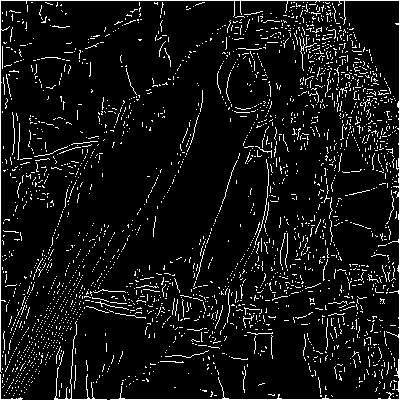

In [37]:
canny_algorithm('../docs/imgs/arara-azul.jpg', 70, 100)

## Abrindo a imagem e obtendo seu .data

In [4]:
%%html
<img src = "../docs/imgs/gato-caixa-areia.jpg" width = "600px"></img>

Tamanho da imagem em pixels:
360 x 490
Tamanho do nosso array de pixels:
(176400, 3)


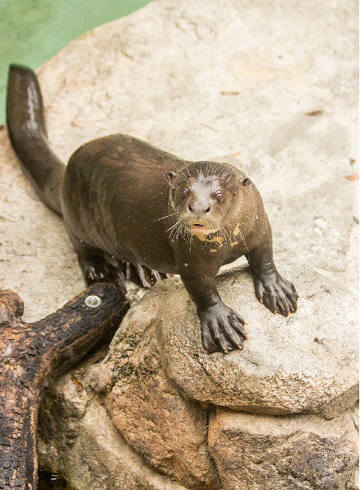

In [8]:
im = Image.open('../docs/imgs/ariranha.jpg')
data = np.array(im.getdata())
print('Tamanho da imagem em pixels:')
print(im.width, 'x', im.height)
print('Tamanho do nosso array de pixels:')
print(data.shape)
width = im.width
height = im.height
display(im)

In [12]:
data.shape

(176400, 3)

## Tornando a imagem em grayscale

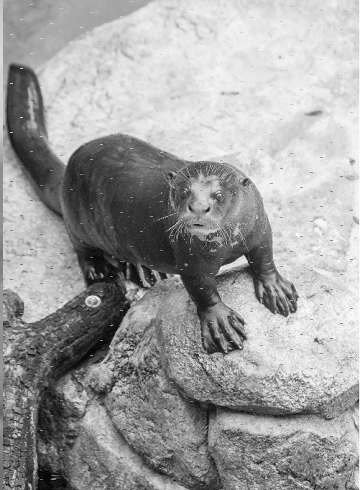

In [18]:
for i in range(len(data)):
    data[i][0] = data[i][1] = data[i][2] = int(data[i].mean())
data = data.reshape(height, width, 3).astype(np.uint8)
gray_scale = Image.fromarray(data)
display(gray_scale)

## Aplicando o filtro gaussiano

In [21]:
def filtro_gaussiano(sigma, data):
    gauss_mat = np.array([[1,4,7,4,1], [4, 16, 26, 16, 4], [7, 26, 41, 26, 7], [4, 16, 26, 16, 4], [1,4,7,4,1]]) 
    coef = 273
    ans = np.zeros(data.shape)
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            ans[i][j][0] = ans[i][j][1] = ans[i][j][2] = np.round(convolution(gauss_mat, data, i, j)/coef)
    return ans

def convolution(matriz_coef, data, x, y):
    ans = 0
    for i in range(x-2,x+3):
        for j in range(y-2,y+3):
            if (0<=i<height) and (0<=j<width):
                ans += matriz_coef[i+2-x][j+2-y]*data[i][j][1]
            else:
                ans += matriz_coef[i+2-x][j+2-y]*data[x][y][1]
    return ans

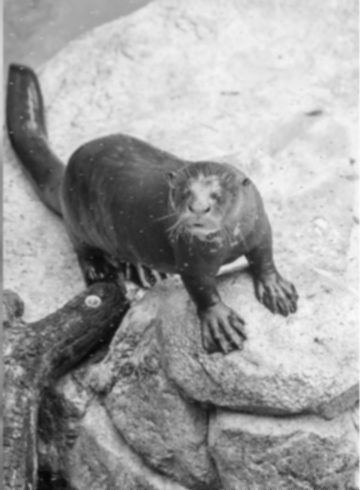

In [22]:
data1 = filtro_gaussiano(1, data)
efeito_gaussiano = Image.fromarray(data1.astype(np.uint8))
display(efeito_gaussiano)

## Aplicando o kernel de Sobel para a detectação dos gradientes

In [25]:
def sobel_kernel(data):
    gx_m = np.array([[-1, 0,1],[-2, 0,2],[-1,0,1]])
    gy_m = np.array([[1,2,1], [0,0,0], [-1,-2,-1]])
    ans = np.zeros(data.shape)
    theta = np.zeros(data.shape[0:2])
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            gx = convolution2(gx_m, data, i, j)
            gy = convolution2(gy_m, data, i, j)
            ans[i][j][0] = ans[i][j][1] = ans[i][j][2] = np.round(np.sqrt(gx**2+ gy**2))
            theta[i][j] = np.arctan2(gx, gy)
    return ans, theta

def convolution2(matriz_coef, data, x, y):
    ans = np.zeros((3,3))
    for i in range(x-1,x+2):
        for j in range(y-1,y+2):
            if (0<=i<height) and (0<=j<width):
                ans[i+1-x][j+1-y] = matriz_coef[i+1-x][j+1-y]*data[i][j][1]
            else:
                ans[i+1-x][j+1-y] = 0
    return sum(sum(ans))

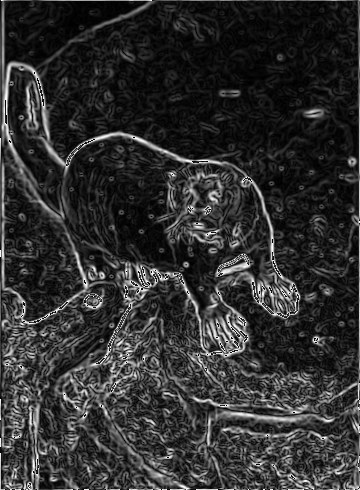

In [26]:
data2, direc = sobel_kernel(data1)
sobel_kernel = Image.fromarray(data2.astype(np.uint8))
display(sobel_kernel)

In [27]:
def round_quad(theta):
    m, n = theta.shape
    theta = theta.tolist()
    for i in range(m):
        for j in range(n):
            theta[i][j] = verif_theta(theta[i][j])
    return theta

def verif_theta(val):
    if -np.pi/8<val<=np.pi/8:
        return np.array([1,0])
    elif np.pi/8<val<=np.pi*3/8:
        return np.array([1,1])
    elif np.pi*3/8<val<=np.pi*5/8:
        return np.array([0,1])
    elif np.pi*5/8<val<=np.pi*7/8:
        return np.array([-1,1])
    elif np.pi*7/8<val or val<=-np.pi*7/8:
        return np.array([-1,0])
    elif -np.pi*7/8<val<=-np.pi*5/8:
        return np.array([-1,-1])
    elif -np.pi*5/8<val<=-np.pi*3/8:
        return np.array([0,-1])
    elif -np.pi*3/8<val<=-np.pi/8:
        return np.array([1,-1])
        

In [28]:
direc = round_quad(direc)

In [36]:
direc == np.array([0,-1])

array([[[False, False],
        [False, False],
        [False, False],
        ...,
        [False, False],
        [False, False],
        [False,  True]],

       [[ True, False],
        [ True,  True],
        [ True,  True],
        ...,
        [ True, False],
        [ True, False],
        [ True,  True]],

       [[ True, False],
        [ True,  True],
        [ True,  True],
        ...,
        [ True, False],
        [ True, False],
        [ True,  True]],

       ...,

       [[ True, False],
        [ True,  True],
        [False,  True],
        ...,
        [False, False],
        [False, False],
        [ True,  True]],

       [[ True, False],
        [False,  True],
        [False, False],
        ...,
        [False, False],
        [False, False],
        [ True,  True]],

       [[False, False],
        [False, False],
        [False, False],
        ...,
        [False, False],
        [False, False],
        [False,  True]]])

## Aplicando a supressão de não-máximos

In [29]:
def supress_nmax(data, theta):
    ans = np.copy(data)
    counter = 0
    for i in range(1,data.shape[0]-2):
        for j in range(1, data.shape[1]-2):
            gradiente = tuple(np.array([i,j])+theta[i][j])
            n_gradiente = tuple(np.array([i,j])-theta[i][j])
            if data[(i,j)][0]>= data[gradiente][0] and data[(i,j)][0]>= data[n_gradiente][0]:
                pass
            else:
                ans[(i,j)][0] = ans[(i,j)][1] = ans[(i,j)][2] = 0
    return ans

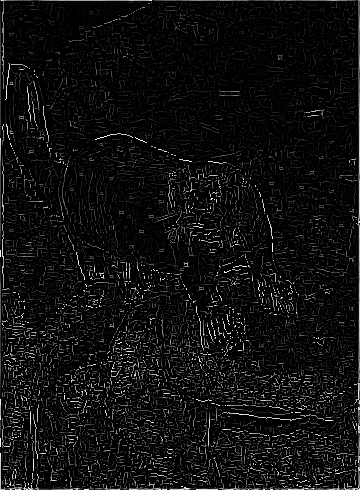

In [30]:
data3 = supress_nmax(data2, direc)
supressed = Image.fromarray(data3.astype(np.uint8))
display(supressed)

## Limite de arestas

In [163]:
def double_treshold(data, t1, t2):
    classif = data[:,:,1]
    ans = np.copy(data)
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            if data[(i,j)][0] < t1:
                ans[(i,j)][0] = ans[(i,j)][1] = ans[(i,j)][2] = 0
                classif[(i,j)] = 0
            elif t1 < data[(i,j)][0] < t2:
                ans[(i,j)][0] = ans[(i,j)][1] = ans[(i,j)][2] = 255
                classif[(i,j)] = 1
            else:
                ans[(i,j)][0] = ans[(i,j)][1] = ans[(i,j)][2] = 255
                classif[(i,j)] = 2
    return ans, classif

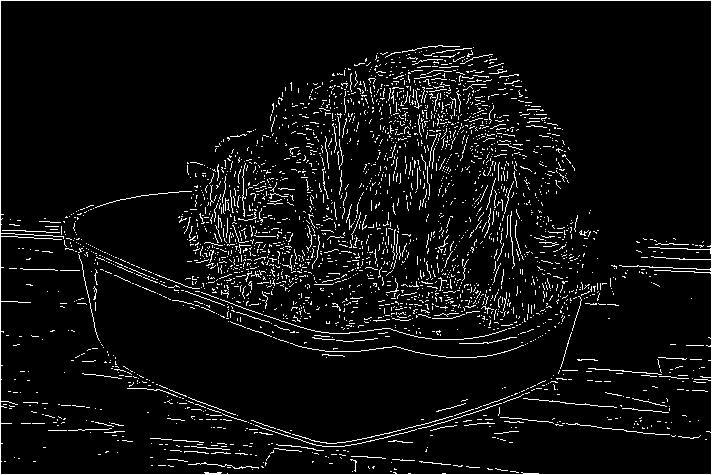

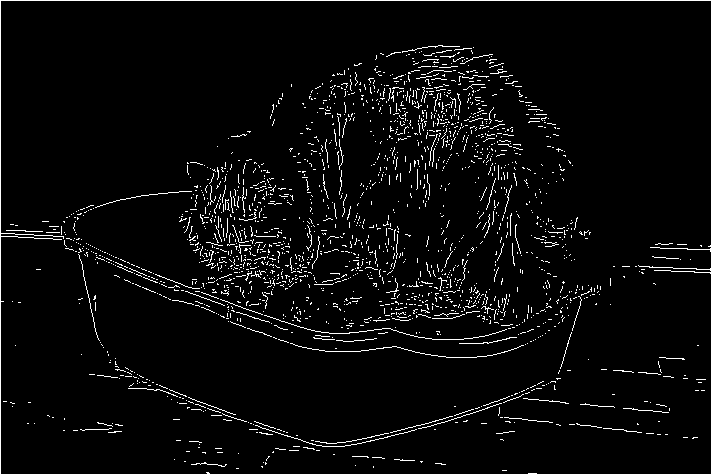

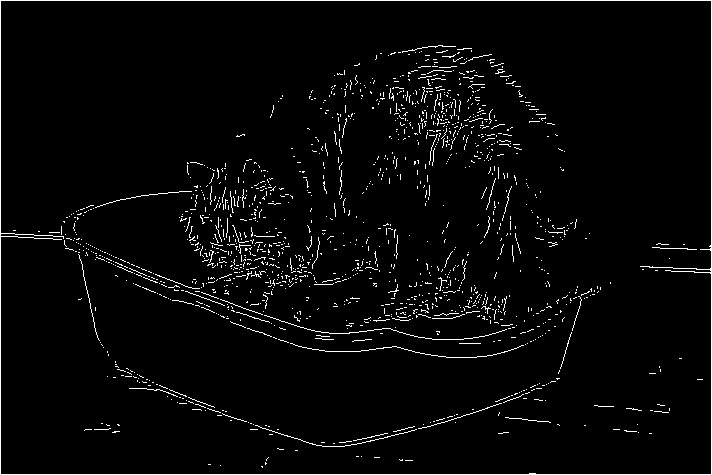

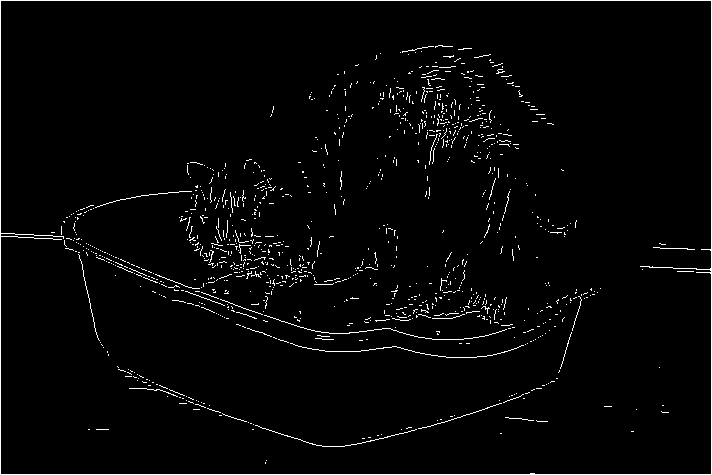

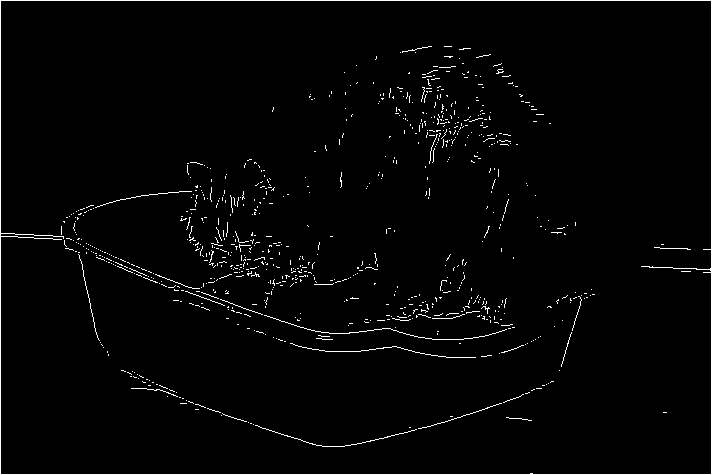

In [172]:
for k in range(30, 80, 10):
    data4, clf = double_treshold(data3, k, 150)
    finished = Image.fromarray(data4.astype(np.uint8))
    display(finished)

## Bibliografia

[Wikipédia](https://en.wikipedia.org/wiki/Canny_edge_detector) - Canny Edge Detector.